# Support Vector Regression (SVR)

## 1. Overview

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) that is used for regression tasks. In SVR, the objective is to fit the best line within a threshold value (which is defined using a parameter called epsilon) in such a way that errors do not exceed this threshold. Unlike traditional regression models that try to minimize the error between the predicted and actual value, SVR focuses on fitting the best line within a predefined or threshold error limit.

In SVR, we introduce something called the 'epsilon-insensitive tube'. This tube defines a range within which predictions are considered acceptable. The algorithm then tries to find a line (in two-dimensional space) or a hyperplane (in multi-dimensional space) that best fits the data points while keeping most of them within this tube.

## Explanation in Layman's Terms

Imagine you are a chef who has been asked to prepare a dish that should weigh exactly 500 grams, but it's acceptable if the dish weighs within 495 to 505 grams. This range is your threshold. Now, your goal is to add ingredients in such a way that the final dish is as close as possible to 500 grams, but you're allowed some wiggle room (the epsilon-insensitive tube) without penalty.

Support Vector Regression (SVR) works in a similar manner. Think of the actual 500 grams as the target value you want to predict. SVR tries to get as close as possible to this target. The epsilon-insensitive tube is like the 495-505 grams range; it's okay if the predictions are within this range, and they won't be penalized. SVR aims to find the perfect balance of ingredients (predictors) to make a dish (prediction) that is satisfying (accurate) but still within the acceptable range (epsilon tube).

This approach allows SVR to ignore minor errors (as long as they are within the threshold), focusing on the bigger picture (major trends in the data), which often results in a model that generalizes well on unseen data.


## 2. History of Support Vector Regression (SVR)

1. **Development and History**:  The adaptation of SVM to regression was primarily developed by Vladimir Vapnik, co-inventor of the original SVM, in the late 1990s. 

2. **Name Origin**: The name "Support Vector Regression" reflects its origins from the Support Vector Machine (SVM) model. In SVR, the term "Support Vector" refers to the concept of using support vectors (data points that are closest to the decision boundary) to construct a model. The addition of "Regression" signifies the model's adaptation to regression problems, where the goal is to predict a continuous outcome, as opposed to classification tasks targeted by the original SVM. This adaptation maintains the core SVM principle of maximizing the margin while allowing for a certain degree of error in predictions.


## 3. Sample Code

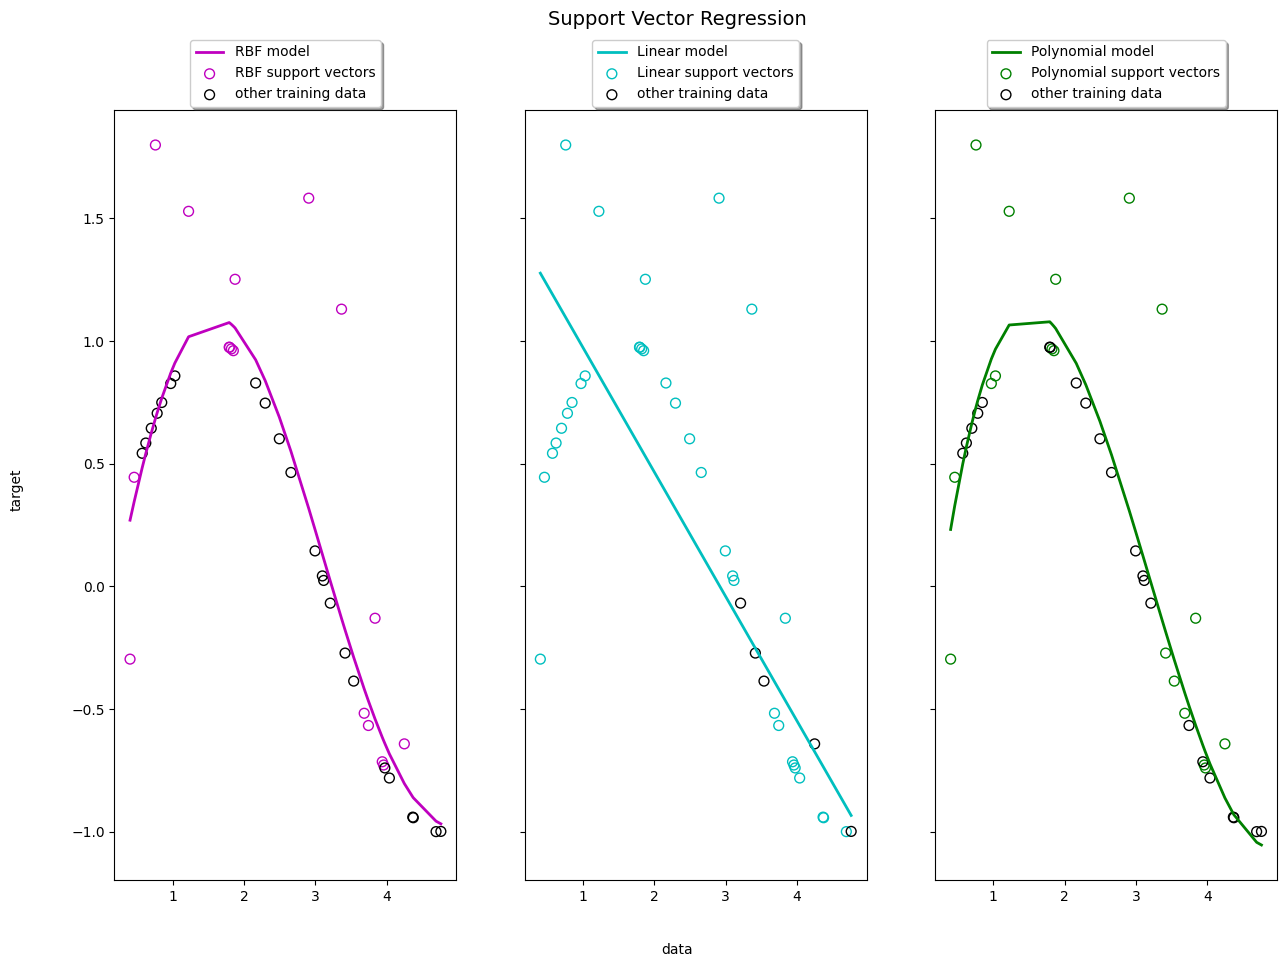

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# Look at the results
lw = 2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()


The diagram illustrates three types of Support Vector Regression (SVR) models: RBF (Radial Basis Function), Linear, and Polynomial, each fitted to the same set of data points:

RBF kernel SVR (magenta line) is good for data where the relationship between features and target variables is non-linear and complex.

Linear kernel SVR (cyan line) works well with data that can be separated or explained with a straight line in the feature space.

Polynomial kernel SVR (green line) can model non-linear relationships that can be captured with polynomial terms.

Each subplot shows:

The SVR prediction line for the corresponding kernel.
The individual data points used to train the SVR. The support vectors (data points that define the margin) are highlighted with a circle.
Other training data points are shown with a plus sign.
Support vectors are crucial in defining the model and are the only points that directly affect the shape of the regression function. SVR is particularly useful when you want to avoid the influence of outliers or when the data has a lot of noise. It tries to fit the error within a certain threshold and can provide robust predictions.

## 4. Usecases in Finance 

- **Stock Price Prediction:** Forecasting stock prices based on historical data and market indicators using SVR’s ability to model non-linear relationships.

- **Volatility Prediction:** Predicting market volatility by analyzing historical price movements and macroeconomic variables.

- **Risk Assessment:** Estimating financial risk levels for portfolios or investments by capturing complex relationships between input features.

- **Loan Default Prediction:** Modeling the likelihood of loan default using SVR to handle non-linear relationships between borrower attributes.

- **Expense Forecasting:** Predicting operational or customer expenses by capturing intricate patterns in financial datasets.

- **Revenue Prediction:** Forecasting company revenue trends by modeling the non-linear relationships between key predictors such as market demand and seasonal effects.

- **Option Pricing:** Estimating the fair value of options by modeling non-linear dependencies in the financial markets.

- **Credit Scoring:** Predicting creditworthiness by analyzing borrower features with complex, non-linear relationships.

- **Fraud Detection:** Estimating the likelihood of fraudulent transactions by capturing subtle patterns in transaction data.

- **Macroeconomic Indicator Forecasting:** Predicting indicators like GDP growth or inflation rates by capturing non-linear trends in economic data.
